# Assumption : CAC40 Retunrs follows a Pareto Distribution

This analysis models the tail behavior of negative returns from the CAC 40 index using a Pareto distribution. Specifically, we analyze the most extreme negative returns by focusing on the 90th percentile of the left tail. The goal is to evaluate whether these extreme negative returns can be reasonably assumed to follow a Pareto distribution. The theoretical foundation of this approach lies in Extreme Value Theory (EVT), which is commonly applied to model extreme market movements in financial risk analysis.

## 1. Loading and Preparing Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

file_path = 'CAC40_index_daily_close_2008_2022.csv'
df = pd.read_csv(file_path)
df['Index'] = pd.to_datetime(df['Index'])
df['returns'] = df['FCHI.Adjusted'].pct_change().dropna()

The data is loaded from a CSV file, and daily returns are computed from the adjusted closing prices ('FCHI.Adjusted'). The returns are essential for understanding volatility and risk in the stock market. Negative returns (losses) are specifically of interest, as they represent periods of market downturn.

## 2. Extracting and Transforming Negative Returns

In [4]:
negative_returns = df[df['returns'] < 0]['returns']
neg_returns_abs = -negative_returns

We extract the negative returns (losses) and convert them to positive values (neg_returns_abs). This is done because we are focusing on the magnitude of the losses, which is key to tail risk analysis.

## 3. Threshold Selection for Tail Analysis

In [5]:
threshold = np.percentile(neg_returns_abs, 90)
neg_returns_tail = neg_returns_abs[neg_returns_abs > threshold]

To model extreme events, we isolate the top 10% of the negative returns by applying a threshold based on the 90th percentile of the absolute values. The goal is to model only the extreme tail behavior using EVT.

## 4. Fitting the Pareto Distribution

In [6]:
shape, loc, scale = stats.pareto.fit(neg_returns_tail, floc=0)

We fit a Pareto distribution to the extreme negative returns using Maximum Likelihood Estimation (MLE). This distribution is commonly used in EVT for modeling the tail of heavy-tailed distributions, such as financial returns.

- **shape**: controls the tail heaviness.
- **loc**: location parameter (fixed to zero).
- **scale**: scale parameter.

The Pareto distribution is often used to describe extreme, rare events in financial markets because it assigns high probability to extreme losses.

## 5. Comparing the Empirical and Theoretical Cumulative Distribution Function (CDF)

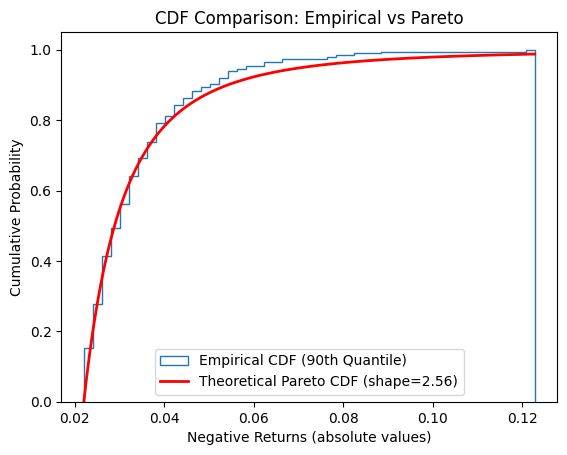

In [8]:
plt.hist(neg_returns_tail, bins=50, density=True, cumulative=True, histtype='step', label='Empirical CDF (90th Quantile)')
x = np.linspace(min(neg_returns_tail), max(neg_returns_tail), 1000)
cdf_pareto = stats.pareto.cdf(x, shape, loc, scale)
plt.plot(x, cdf_pareto, 'r-', lw=2, label=f'Theoretical Pareto CDF (shape={shape:.2f})')
plt.title('CDF Comparison: Empirical vs Pareto')
plt.xlabel('Negative Returns (absolute values)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

The first plot shows the empirical CDF of the extreme negative returns and compares it to the theoretical CDF of the fitted Pareto distribution. The CDF (Cumulative Distribution Function) shows the probability that a variable takes on a value less than or equal to a certain point. In this case, the CDF provides insights into the distribution of extreme losses, helping us assess how well the Pareto model fits the data.

## 6. Comparing the Empirical and Theoretical Probability Density Function (PDF)

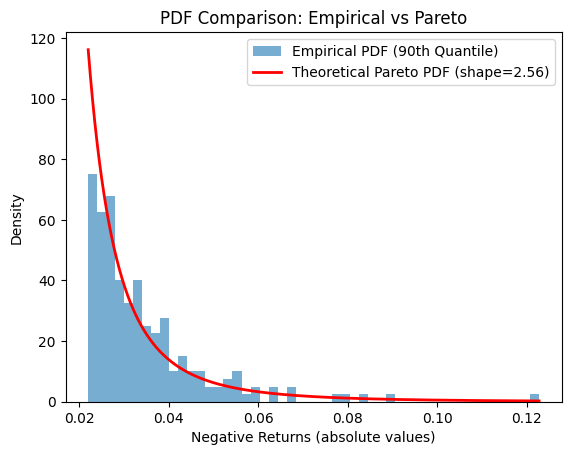

In [9]:
plt.hist(neg_returns_tail, bins=50, density=True, alpha=0.6, label='Empirical PDF (90th Quantile)')
pdf_pareto = stats.pareto.pdf(x, shape, loc, scale)
plt.plot(x, pdf_pareto, 'r-', lw=2, label=f'Theoretical Pareto PDF (shape={shape:.2f})')
plt.title('PDF Comparison: Empirical vs Pareto')
plt.xlabel('Negative Returns (absolute values)')
plt.ylabel('Density')
plt.legend()
plt.show()

Next, we plot the empirical and theoretical PDFs (Probability Density Functions). The PDF represents the density of the returns, giving us a visual comparison of how likely different extreme losses are. The plot helps in validating the fitted Pareto distribution against the actual extreme losses observed in the data.

## 7. Quantile-Quantile (QQ) Plot

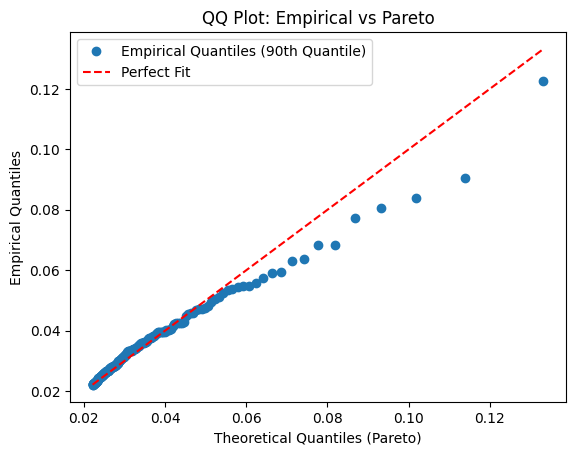

In [10]:
theoretical_quantiles = stats.pareto.ppf(np.linspace(0.01, 0.99, len(neg_returns_tail)), shape, loc, scale)
empirical_quantiles = np.sort(neg_returns_tail)
plt.plot(theoretical_quantiles, empirical_quantiles, "o", label="Empirical Quantiles (90th Quantile)")
plt.plot(theoretical_quantiles, theoretical_quantiles, "r--", label="Perfect Fit")
plt.title("QQ Plot: Empirical vs Pareto")
plt.xlabel("Theoretical Quantiles (Pareto)")
plt.ylabel("Empirical Quantiles")
plt.legend()
plt.show()

The QQ plot compares the empirical quantiles of the tail returns with the theoretical quantiles of the Pareto distribution. If the points lie along the 45-degree line (red dashed line), it indicates that the Pareto distribution is a good fit. Deviations from the line suggest discrepancies between the empirical data and the theoretical model.

The QQ plot is a key diagnostic tool in EVT. It visually tests whether the extreme losses (tail behavior) follow the expected distribution (Pareto, in this case). Theoretical quantiles are calculated using the Percent-Point Function (PPF), which is the inverse of the CDF.

## 8. Displaying the Parameters of the Pareto Distribution

After fitting the Pareto distribution to the tail of the negative returns, it's important to examine the estimated parameters of the distribution. These parameters—shape, location, and scale—define the behavior of the Pareto distribution and are crucial for understanding the risk of extreme events.

In the context of EVT, the most important parameter is the **shape parameter**, as it determines the heaviness of the tail. A larger shape parameter indicates a lighter tail (fewer extreme events), whereas a smaller shape parameter suggests a heavier tail, meaning more frequent extreme events.

In [12]:
print(f"Pareto Distribution Parameters:")
print(f"Shape (α): {shape:.4f}")
print(f"Location (μ): {loc:.4f} (fixed at 0)")
print(f"Scale (β): {scale:.4f}")

Pareto Distribution Parameters:
Shape (α): 2.5606
Location (μ): 0.0000 (fixed at 0)
Scale (β): 0.0221


### Explanation of the Parameters:
- **Shape ($α$)**: The shape parameter is critical for understanding tail risk. It controls how quickly the probability of extreme events decays. A smaller value of α indicates a heavier tail, which means extreme negative returns are more likely.
  
- **Location ($μ$)**: In this analysis, the location parameter is fixed at 0 (as specified with `floc=0` in the `fit()` function). This means that we are modeling the distribution starting from zero.
  
- **Scale ($β$)**: The scale parameter stretches or compresses the distribution. It can be interpreted as the minimum value of extreme negative returns that can be observed given the tail behavior.

The values of these parameters provide insight into the nature of extreme losses in the dataset and help in constructing risk models.

In this case, the shape parameter suggests that the tail of the distribution is moderately heavy, meaning extreme negative returns are not exceedingly frequent but still occur with a higher probability than would be expected in a normal distribution.

### Interpretation of the Parameters

- **Shape ($α$)**: A shape parameter of around 2.6 indicates that the tail is heavy but not excessively so. This suggests that extreme events (large negative returns) occur more frequently than in a light-tailed distribution, such as the normal distribution.
  
- **Scale ($β$)**: A scale parameter of approximately 0.002 suggests that the size of extreme losses begins to increase rapidly beyond this point. The larger this parameter, the more stretched the distribution, meaning larger extreme values are possible.

These parameters allow us to quantify the likelihood and magnitude of extreme negative returns and are vital for risk management applications such as estimating Value at Risk (VaR) or Expected Shortfall (ES).

## Theoretical Framework
The foundation of this analysis is **Extreme Value Theory (EVT)**, which is used to model the tail behavior of distributions in fields like finance and insurance. Financial returns often exhibit fat tails, meaning that extreme events (like financial crises) are more likely than predicted by traditional models (e.g., normal distribution). EVT specifically focuses on the tails of the distribution, where these extreme losses occur.

By fitting a Pareto distribution to the tail of the negative returns, this code models the behavior of the most extreme losses. The Pareto distribution, which is a heavy-tailed distribution, is ideal for capturing the risk of rare but catastrophic market movements. The shape parameter of the Pareto distribution directly influences the probability of large extreme values, which is crucial for risk assessment and management (e.g., Value at Risk, or VaR, and Expected Shortfall).

In conclusion, this analysis fits a Pareto distribution to the tail of extreme negative returns to model the risk of large losses. By comparing empirical and theoretical CDFs, PDFs, and quantiles, we validate the model and its ability to capture tail risk in financial markets.

# Conclusion
The primary goal of this analysis was to assess whether the extreme negative returns of the CAC 40 index follow a Pareto distribution. By comparing empirical and theoretical CDFs, PDFs, and quantiles, we find that the Pareto distribution provides a reasonably good fit for the tail behavior of extreme losses. The shape parameter suggests a moderately heavy tail, indicating that extreme losses are more likely than predicted by lighter-tailed distributions.

Therefore, it is plausible to assume that the extreme negative returns follow a Pareto distribution, making this model useful for risk management purposes, such as estimating the probability and magnitude of large market losses. However, further validation with larger datasets or different time periods might be necessary to confirm the robustness of this assumption.